In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('./Goal4.csv')
df.shape

(191762, 52)

In [3]:
df.describe()

,Goal,GeoAreaCode,TimePeriod,Value,TimeCoverage,UpperBound,LowerBound,BasePeriod,GeoInfoUrl,Unnamed: 26,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,191762.0,191762.000000,191762.000000,179570.000000,0.0,0.0,0.0,2276.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.0,396.544002,2010.212284,41.595042,NaN,NaN,NaN,2018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,250.320400,5.169051,41.230603,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,1.000000,2000.000000,0.000000,NaN,NaN,NaN,2018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.0,188.000000,2006.000000,1.001600,NaN,NaN,NaN,2018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.0,372.000000,2011.000000,34.134145,NaN,NaN,NaN,2018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.0,600.000000,2015.000000,83.482728,NaN,NaN,NaN,2018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.0,921.000000,2020.000000,1632.065770,NaN,NaN,NaN,2018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.00000,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.00000,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.50000,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.50000,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.00000,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191757,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2012,95.54508,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191758,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2012,89.71963,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191759,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2017,100.00000,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191760,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2017,98.75030,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for column in df.columns:
    print("Column: ", column)
    print("Missing values: ", df[column].isnull().sum())
    print("Unique values: ", df[column].unique())

Column:  Goal
Missing values:  0
Unique values:  [4]
Column:  Target
Missing values:  0
Unique values:  [4.1 4.2 4.3 4.4 4.5 '4.5' '4.6' '4.a' '4.b' '4.c']
Column:  Indicator
Missing values:  0
Unique values:  ['4.1.1' '4.1.2' '4.2.1' '4.2.2' '4.3.1' '4.4.1' '4.5.1' '4.6.1' '4.a.1'
 '4.b.1' '4.c.1']
Column:  SeriesCode
Missing values:  0
Unique values:  ['SE_TOT_PRFL' 'SE_TOT_CPLR' 'SE_DEV_ONTRK' 'SE_PRE_PARTN'
 'SE_ADT_EDUCTRN' 'SE_ADT_ACTS' 'SE_AGP_CPRA' 'SE_ALP_CPLR' 'SE_AWP_CPRA'
 'SE_GPI_ICTS' 'SE_GPI_PART' 'SE_GPI_PTNPRE' 'SE_GPI_TCAQ' 'SE_IMP_FPOF'
 'SE_LGP_ACHI' 'SE_NAP_ACHI' 'SE_TOT_GPI' 'SE_TOT_RUPI' 'SE_TOT_SESPI'
 'SE_ADT_FUNS' 'SE_ACC_HNDWSH' 'SE_ACS_CMPTR' 'SE_ACS_ELECT' 'SE_ACS_H2O'
 'SE_ACS_INTNT' 'SE_ACS_SANIT' 'SE_INF_DSBL' 'DC_TOF_SCHIPSL'
 'SE_TRA_GRDL']
Column:  SeriesDescription
Missing values:  0
Unique values:  ['Proportion of children and young people achieving a minimum proficiency level in reading and mathematics (%)'
 'Completion rate, by sex, location, weal

Unique values:  [nan 'M36T59' 'M36T47' '16-65']
Column:  Education level
Missing values:  17879
Unique values:  ['PRIMAR' 'GRAD23' 'LOWSEC' 'UPPSEC' nan 'PREPRI' 'SECOND' '_T']
Column:  Location
Missing values:  78911
Unique values:  [nan 'RURAL' 'URBAN' 'ALLAREA']
Column:  Nature
Missing values:  0
Unique values:  ['C' 'E' 'CA']
Column:  Quantile
Missing values:  55387
Unique values:  [nan 'Q1' 'Q2' 'Q4' 'Q5' '_T' 'Q3']
Column:  Reporting Type
Missing values:  0
Unique values:  ['G']
Column:  Sex
Missing values:  48829
Unique values:  ['BOTHSEX' 'MALE' 'FEMALE' nan]
Column:  Type of skill
Missing values:  175898
Unique values:  ['SKILL_MATH' 'SKILL_READ' nan 'COPA' 'SOFT' 'TRAF' 'PCPR' 'CMFL' 'EPRS'
 'EMAIL' 'INST' 'ARSP' 'NUME' 'LITE']
Column:  Units
Missing values:  0
Unique values:  ['PERCENT' 'Ratio' 'CON_USD']
Column:  Unnamed: 26
Missing values:  191762
Unique values:  [nan]
Column:  Unnamed: 27
Missing values:  191762
Unique values:  [nan]
Column:  Unnamed: 28
Missing values:  

In [6]:
Drop_Columns=["Goal", "SeriesDescription", "TimeCoverage", "UpperBound", "LowerBound", "GeoInfoUrl", "Unnamed: 26", "Unnamed: 27", "Unnamed: 28", "Unnamed: 29", "Unnamed: 30", "Unnamed: 31", "Unnamed: 32", "Unnamed: 33", "Unnamed: 34", "Unnamed: 35", "Unnamed: 36", "Unnamed: 37", "Unnamed: 38", "Unnamed: 39", "Unnamed: 40", "Unnamed: 41", "Unnamed: 42", "Unnamed: 43", "Unnamed: 44", "Unnamed: 45", "Unnamed: 46", "Unnamed: 47", "Unnamed: 48", "Unnamed: 49", "Unnamed: 50", "Unnamed: 51"]

In [7]:
df.isnull().sum()

Goal                      0
Target                    0
Indicator                 0
SeriesCode                0
SeriesDescription         0
GeoAreaCode               0
GeoAreaName               0
TimePeriod                0
Value                 12192
Time_Detail               0
TimeCoverage         191762
UpperBound           191762
LowerBound           191762
BasePeriod           189486
Source                    0
GeoInfoUrl           191762
FootNote             176950
Age                  191281
Education level       17879
Location              78911
Nature                    0
Quantile              55387
Reporting Type            0
Sex                   48829
Type of skill        175898
Units                     0
Unnamed: 26          191762
Unnamed: 27          191762
Unnamed: 28          191762
Unnamed: 29          191762
Unnamed: 30          191762
Unnamed: 31          191762
Unnamed: 32          191762
Unnamed: 33          191762
Unnamed: 34          191762
Unnamed: 35         

In [8]:
df = df.drop(Drop_Columns, axis =1)

In [9]:
df.isnull().sum()

Target                  0
Indicator               0
SeriesCode              0
GeoAreaCode             0
GeoAreaName             0
TimePeriod              0
Value               12192
Time_Detail             0
BasePeriod         189486
Source                  0
FootNote           176950
Age                191281
Education level     17879
Location            78911
Nature                  0
Quantile            55387
Reporting Type          0
Sex                 48829
Type of skill      175898
Units                   0
dtype: int64

In [10]:
df.describe()

,GeoAreaCode,TimePeriod,Value,BasePeriod
count,191762.000000,191762.000000,179570.000000,2276.0
mean,396.544002,2010.212284,41.595042,2018.0
std,250.320400,5.169051,41.230603,0.0
min,1.000000,2000.000000,0.000000,2018.0
25%,188.000000,2006.000000,1.001600,2018.0
50%,372.000000,2011.000000,34.134145,2018.0
75%,600.000000,2015.000000,83.482728,2018.0
max,921.000000,2020.000000,1632.065770,2018.0


In [11]:
df.isnull().mean()

Target             0.000000
Indicator          0.000000
SeriesCode         0.000000
GeoAreaCode        0.000000
GeoAreaName        0.000000
TimePeriod         0.000000
Value              0.063579
Time_Detail        0.000000
BasePeriod         0.988131
Source             0.000000
FootNote           0.922758
Age                0.997492
Education level    0.093235
Location           0.411505
Nature             0.000000
Quantile           0.288832
Reporting Type     0.000000
Sex                0.254633
Type of skill      0.917272
Units              0.000000
dtype: float64

In [12]:
df["Target"].unique()

array([4.1, 4.2, 4.3, 4.4, 4.5, '4.5', '4.6', '4.a', '4.b', '4.c'],
      dtype=object)

In [13]:
df["TimePeriod"].unique()

array([2013, 2016, 2000, 2009, 2012, 2015, 2018, 2007, 2006, 2011, 2003,
       2017, 2001, 2014, 2008, 2010, 2004, 2019, 2005, 2002, 2020])

In [14]:
df[df["TimePeriod"] == 2018].isnull().sum()

Target                0
Indicator             0
SeriesCode            0
GeoAreaCode           0
GeoAreaName           0
TimePeriod            0
Value               106
Time_Detail           0
BasePeriod         9701
Source                0
FootNote           9433
Age                9825
Education level    1479
Location           5905
Nature                0
Quantile           5041
Reporting Type        0
Sex                3376
Type of skill      7884
Units                 0
dtype: int64

In [15]:
missing_columns = ["Value", "Education level", "Location", "Quantile", "Sex"]

In [16]:
df[missing_columns]

,Value,Education level,Location,Quantile,Sex
0,11.00000,PRIMAR,NaN,NaN,BOTHSEX
1,13.00000,PRIMAR,NaN,NaN,BOTHSEX
2,21.50000,GRAD23,NaN,NaN,MALE
3,22.50000,GRAD23,NaN,NaN,FEMALE
4,22.00000,GRAD23,NaN,NaN,BOTHSEX
...,...,...,...,...,...
191757,95.54508,LOWSEC,NaN,NaN,FEMALE
191758,89.71963,LOWSEC,NaN,NaN,MALE
191759,100.00000,PRIMAR,NaN,NaN,MALE
191760,98.75030,PRIMAR,NaN,NaN,BOTHSEX


In [17]:
df["Location"].unique()

array([nan, 'RURAL', 'URBAN', 'ALLAREA'], dtype=object)

Numerical : value
Categorical : sex, Education Level, Location, Quantile

In [18]:
df= df.dropna(subset=["Value"], axis = 0)

In [19]:
df[df["TimePeriod"] == 2018].isnull().sum()

Target                0
Indicator             0
SeriesCode            0
GeoAreaCode           0
GeoAreaName           0
TimePeriod            0
Value                 0
Time_Detail           0
BasePeriod         9595
Source                0
FootNote           9433
Age                9719
Education level    1479
Location           5874
Nature                0
Quantile           5041
Reporting Type        0
Sex                3353
Type of skill      7778
Units                 0
dtype: int64

In [20]:
df.groupby("GeoAreaName")

In [21]:
def impute_mode(df, columns, column1):
    for column in columns:
        mode0 = round(df[columns][df[column1] == 0][column].mode()[0])
        print(mode0)
        mode1 = round(df[df[column].values != -1][df[column1] == 1][column].mode()[0])
        print(mode1)
        mask = (df[column] == -1) & (df[column1] == 0)
        df[column][mask] = mode0
        mask = (df[column] == -1) & (df[column1] == 1)
        df[column][mask] = mode1
        print((df[column].values == -1).sum())
    return df

In [22]:
Country = pd.DataFrame(df.groupby("GeoAreaName"))

In [23]:
def fill_mode_for_Categorical_attribute(df, columns):
    for c in columns :
        most_frequent_value =df[c].mode()[0]
        df[c].fillna(most_frequent_value,inplace=True)
    return df

In [24]:
df = fill_mode_for_Categorical_attribute(df, ["Education level", "Location", "Quantile", "Sex"])

In [25]:
df.isnull().sum()

Target                  0
Indicator               0
SeriesCode              0
GeoAreaCode             0
GeoAreaName             0
TimePeriod              0
Value                   0
Time_Detail             0
BasePeriod         177294
Source                  0
FootNote           176950
Age                179089
Education level         0
Location                0
Nature                  0
Quantile                0
Reporting Type          0
Sex                     0
Type of skill      163706
Units                   0
dtype: int64

In [26]:
df['Education level'] = df.groupby("GeoAreaName", sort=False)['Education level'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [27]:
from scipy import stats

In [29]:
df = df.drop(["Age", "BasePeriod", "FootNote", "Type of skill"], axis=1)

**Cleaned Data**

In [33]:
df

,Target,Indicator,SeriesCode,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Education level,Location,Nature,Quantile,Reporting Type,Sex,Units
0,4.1,4.1.1,SE_TOT_PRFL,4,Afghanistan,2013,11.00000,2013,National Learning Assessment (NLA): Monitoring...,PRIMAR,ALLAREA,C,_T,G,BOTHSEX,PERCENT
1,4.1,4.1.1,SE_TOT_PRFL,4,Afghanistan,2013,13.00000,2013,National Learning Assessment (NLA): Monitoring...,PRIMAR,ALLAREA,C,_T,G,BOTHSEX,PERCENT
2,4.1,4.1.1,SE_TOT_PRFL,4,Afghanistan,2016,21.50000,2016,National Learning Assessment (NLA): Monitoring...,GRAD23,ALLAREA,C,_T,G,MALE,PERCENT
3,4.1,4.1.1,SE_TOT_PRFL,4,Afghanistan,2016,22.50000,2016,National Learning Assessment (NLA): Monitoring...,GRAD23,ALLAREA,C,_T,G,FEMALE,PERCENT
4,4.1,4.1.1,SE_TOT_PRFL,4,Afghanistan,2016,22.00000,2016,National Learning Assessment (NLA): Monitoring...,GRAD23,ALLAREA,C,_T,G,BOTHSEX,PERCENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191757,4.c,4.c.1,SE_TRA_GRDL,894,Zambia,2012,95.54508,2012,UIS,LOWSEC,ALLAREA,E,_T,G,FEMALE,PERCENT
191758,4.c,4.c.1,SE_TRA_GRDL,894,Zambia,2012,89.71963,2012,UIS,LOWSEC,ALLAREA,E,_T,G,MALE,PERCENT
191759,4.c,4.c.1,SE_TRA_GRDL,894,Zambia,2017,100.00000,2017,UIS,PRIMAR,ALLAREA,C,_T,G,MALE,PERCENT
191760,4.c,4.c.1,SE_TRA_GRDL,894,Zambia,2017,98.75030,2017,UIS,PRIMAR,ALLAREA,C,_T,G,BOTHSEX,PERCENT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179570 entries, 0 to 191761
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Target           179570 non-null  object 
 1   Indicator        179570 non-null  object 
 2   SeriesCode       179570 non-null  object 
 3   GeoAreaCode      179570 non-null  int64  
 4   GeoAreaName      179570 non-null  object 
 5   TimePeriod       179570 non-null  int64  
 6   Value            179570 non-null  float64
 7   Time_Detail      179570 non-null  object 
 8   Source           179570 non-null  object 
 9   Education level  179570 non-null  object 
 10  Location         179570 non-null  object 
 11  Nature           179570 non-null  object 
 12  Quantile         179570 non-null  object 
 13  Reporting Type   179570 non-null  object 
 14  Sex              179570 non-null  object 
 15  Units            179570 non-null  object 
dtypes: float64(1), int64(2), object(13)
me

In [ ]:
df

In [ ]:
len(df["GeoAreaName"].unique())

254

In [ ]:
len(df["GeoAreaCode"].unique())

254

# Modeling

In [115]:
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from arch import arch_model
import statsmodels.api

In [79]:
data = df[122:193]

In [81]:
data = data[['Value','TimePeriod']]
data

,Value,TimePeriod
122,84.020000,2000
123,91.640000,2000
124,87.538588,2000
125,90.690000,2000
126,88.850000,2000
...,...,...
188,75.645283,2018
189,85.258814,2018
190,80.372611,2018
191,77.784157,2018


In [90]:
data['TimePeriod']= pd.to_datetime(data['TimePeriod'], format='%Y')

In [86]:
#data = df[df['GeoAreaName'] == 'Australia']

In [93]:
data = data.set_index('TimePeriod')
data

,Value
TimePeriod,
2000-01-01,84.020000
2000-01-01,91.640000
2000-01-01,87.538588
2000-01-01,90.690000
2000-01-01,88.850000
...,...
2018-01-01,75.645283
2018-01-01,85.258814
2018-01-01,80.372611


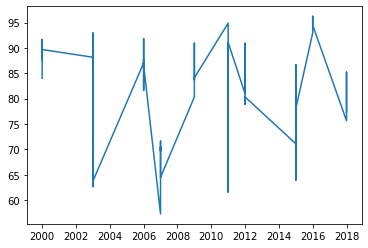

In [94]:
plt.plot(data)
plt.show()

In [95]:
res1 = smt.stattools.adfuller(data)
res1

(-4.442390854804741,
 0.0002495478771843835,
 11,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 430.6997225253499)

### Since the p-value is 0.0002, we can reject the null hypothesis. So it's a weakly stationary.

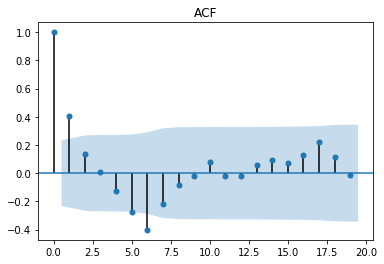

In [98]:
plot_acf(data)
plt.title("ACF")
plt.show()

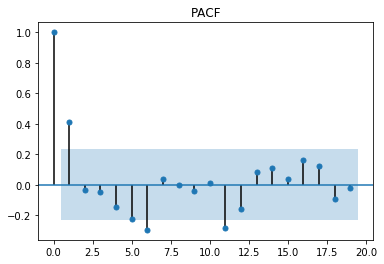

In [99]:
plot_pacf(data)
plt.title("PACF")
plt.show()

In [102]:
sm.stats.diagnostic.acorr_ljungbox(data, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,11.999409,0.000532
2,13.367177,0.001251
3,13.369929,0.003901
4,14.669040,0.005439
5,20.696576,0.000924
6,33.638341,0.000008
7,37.447339,0.000004
8,38.005980,0.000008
9,38.045748,0.000017
10,38.543254,0.000031


### The p-value for Ljung-Box test mostly rejects the null hypo, so the model doesn't fit. There are significant autocorrelations at lag 6.

## select the model

In [103]:
res = sm.tsa.stattools.arma_order_select_ic(data, ic=['aic','bic'], trend='nc')

In [104]:
res.aic_min_order

(2, 1)

In [105]:
res.bic_min_order

(2, 1)

In [110]:
model = ARMA(data, order=(2,1)).fit(trend='nc', disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   71
Model:                     ARMA(2, 1)   Log Likelihood                -265.397
Method:                       css-mle   S.D. of innovations              9.648
Date:                Thu, 03 Jun 2021   AIC                            538.794
Time:                        16:00:21   BIC                            547.844
Sample:                             0   HQIC                           542.393
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Value     1.4180        nan        nan        nan         nan         nan
ar.L2.Value    -0.4180        nan        nan        nan         nan         nan
ma.L1.Value    -0.9973      0.000  -3789.908      0.000      -0.998      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            2.3926           +0.0000j            2.3926            0.0000
MA.1            1.0027           +0.0000j            1.0027            0.0000
-----------------------------------------------------------------------------
"""

In [111]:
sm.stats.diagnostic.acorr_ljungbox(model.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.195892,0.658057
2,0.202486,0.903713
3,0.273350,0.964960
4,0.297097,0.990001
5,0.422789,0.994679
6,2.281928,0.892031
7,3.859598,0.795800
8,4.401147,0.819240
9,4.698328,0.859773
10,6.180736,0.799857


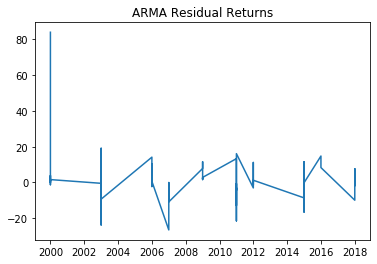

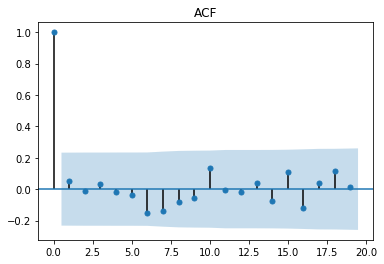

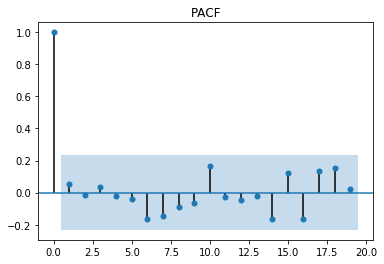

In [112]:
plt.plot(model.resid)
plt.title("ARMA Residual Returns")
plot_acf(model.resid)
plt.title("ACF")
plot_pacf(model.resid)
plt.title("PACF")
plt.show()

### ARMA(4,2) fits well here. The p-value for Ljung-Box test on residuals cannot reject the null hypo, so the model is a good fit. Also the ACF and PACF on residuals are all within the significant level.

## test for accurcy

In [113]:
sm.stats.diagnostic.acorr_ljungbox(model.resid**2, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,2.258570e-09,0.999962
2,1.146868e-02,0.994282
3,3.223865e-02,0.998475
4,7.089761e-02,0.999386
5,1.044062e-01,0.999819
6,1.252141e-01,0.999961
7,2.611947e-01,0.999937
8,3.087142e-01,0.999979
9,3.087460e-01,0.999996
10,3.087777e-01,0.999999


In [116]:
statsmodels.stats.diagnostic.het_arch(model.resid)

(11.86694217307642, 0.45642407839210997, 0.965138845093304, 0.4944860697426715)

### The p-value for Ljung-Box test on residuals cannot rejects the null hypo, so the model is a good fits. The p-value for Engle test also cannot rejects the null hypo, which means there are not significant ARCH effects. We don't need GARCH model.

In [129]:
#res2 = model.fit()
forecasts = model.forecast(steps=2)

In [130]:
forecasts

(array([78.29773343, 78.69705991]),
 array([ 9.6482172 , 10.46721851]),
 array([[59.38757521, 97.20789165],
        [58.18168861, 99.21243121]]))

In [131]:
forecasts[0]

array([78.29773343, 78.69705991])